In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

In [9]:
cancer = pd.read_csv(r'C:\Users\ppawa\Pranav\Study\Engineering\SEM 5\ML\Lab\ML-Labs\BreastCancer.csv')
cancer['diagnosis'] = cancer['diagnosis'].map({'M': 1, 'B': 0})

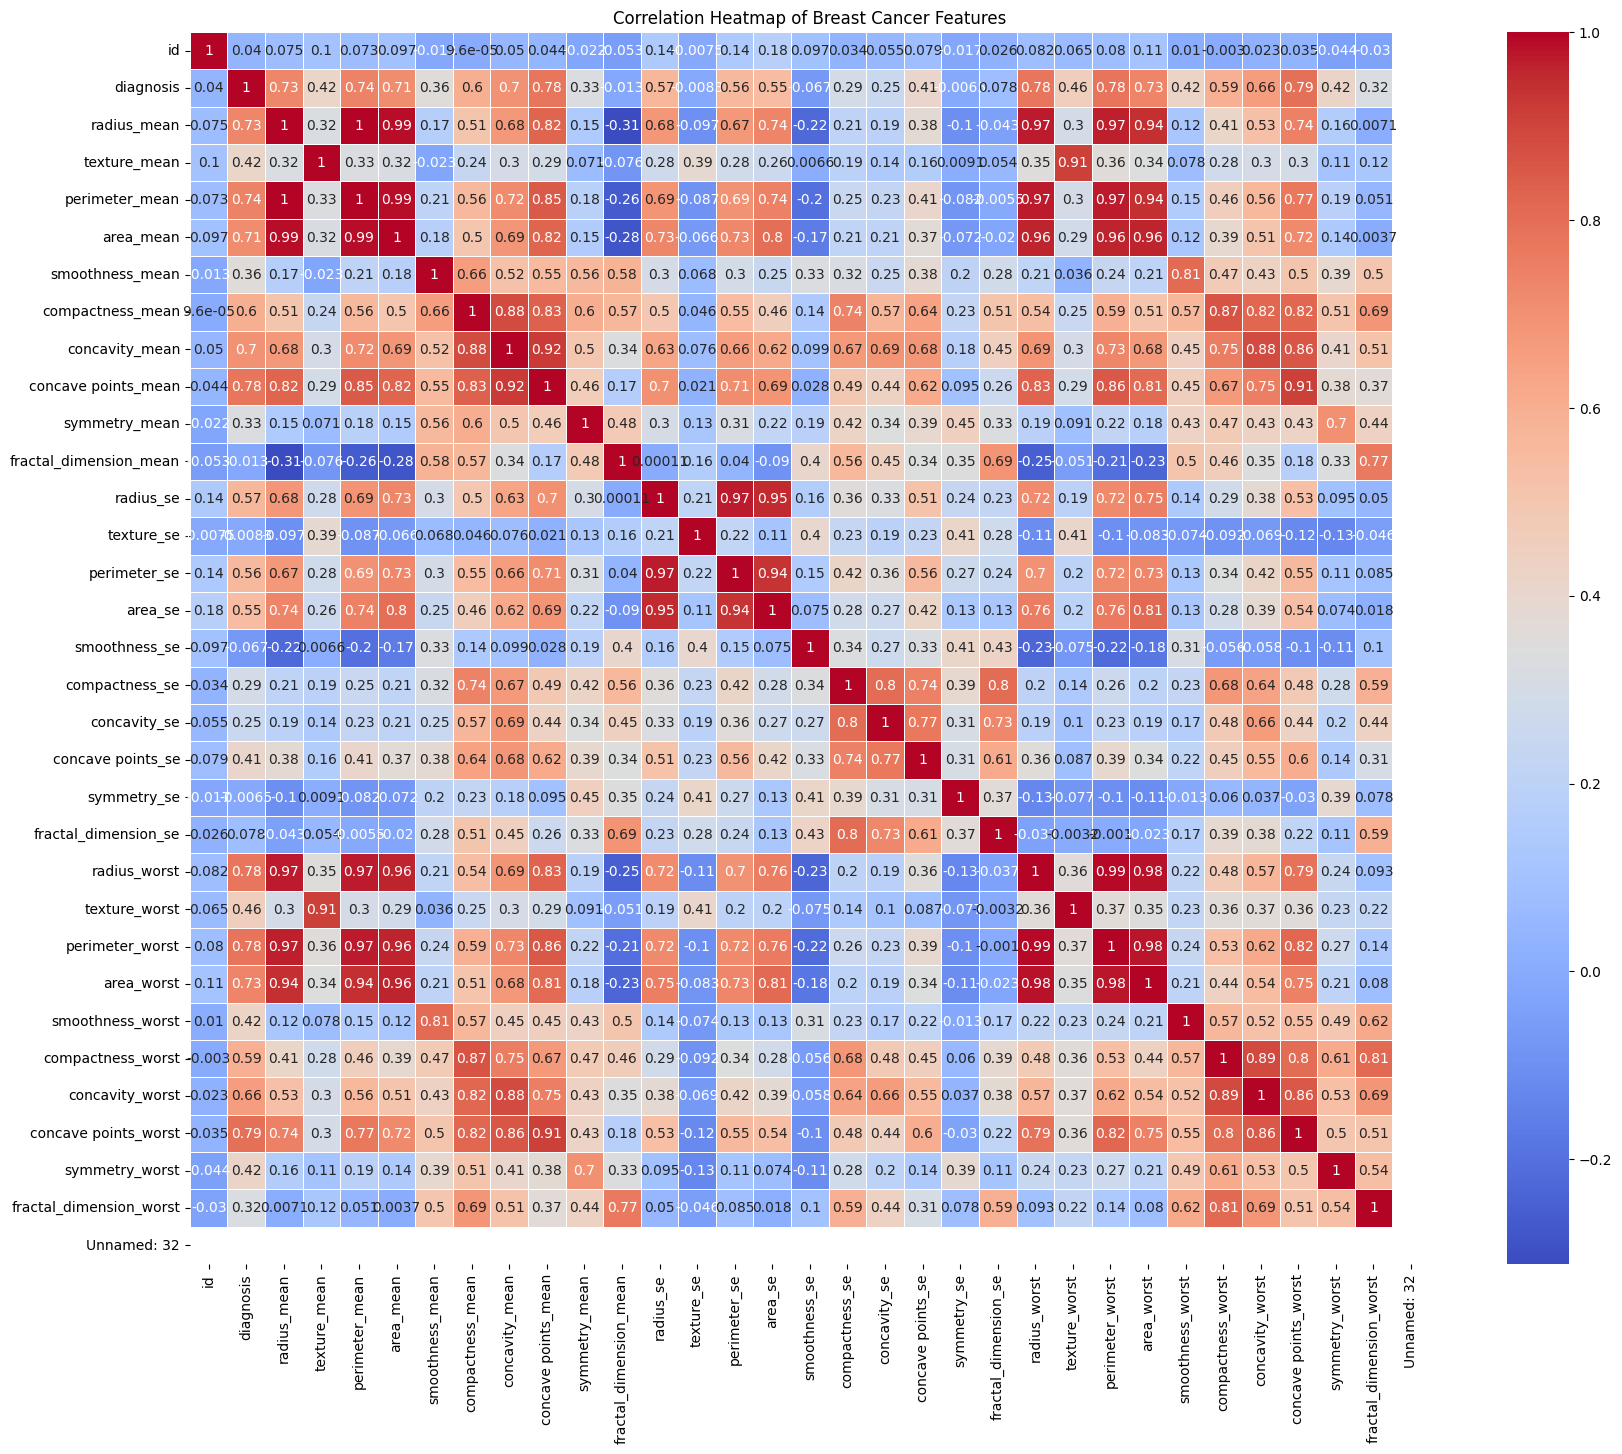

In [10]:
# Correlation Heatmap
plt.figure(figsize=(20,16))
sns.heatmap(cancer.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Breast Cancer Features')
plt.show()

C:\Users\ppawa\AppData\Local\Temp\ipykernel_26304\2103671281.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='diagnosis', data=cancer, palette='Set2')


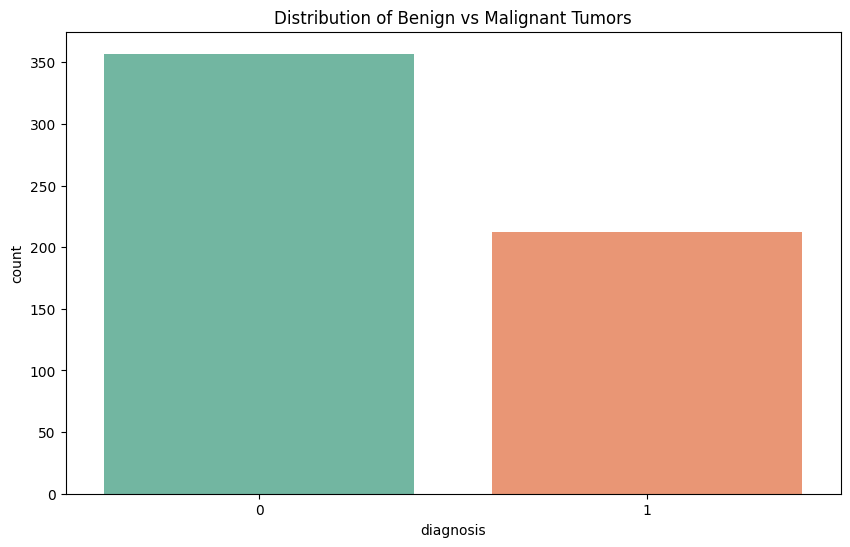

In [11]:
# Distribution of Diagnosis
plt.figure(figsize=(10,6))
sns.countplot(x='diagnosis', data=cancer, palette='Set2')
plt.title('Distribution of Benign vs Malignant Tumors')
plt.show()

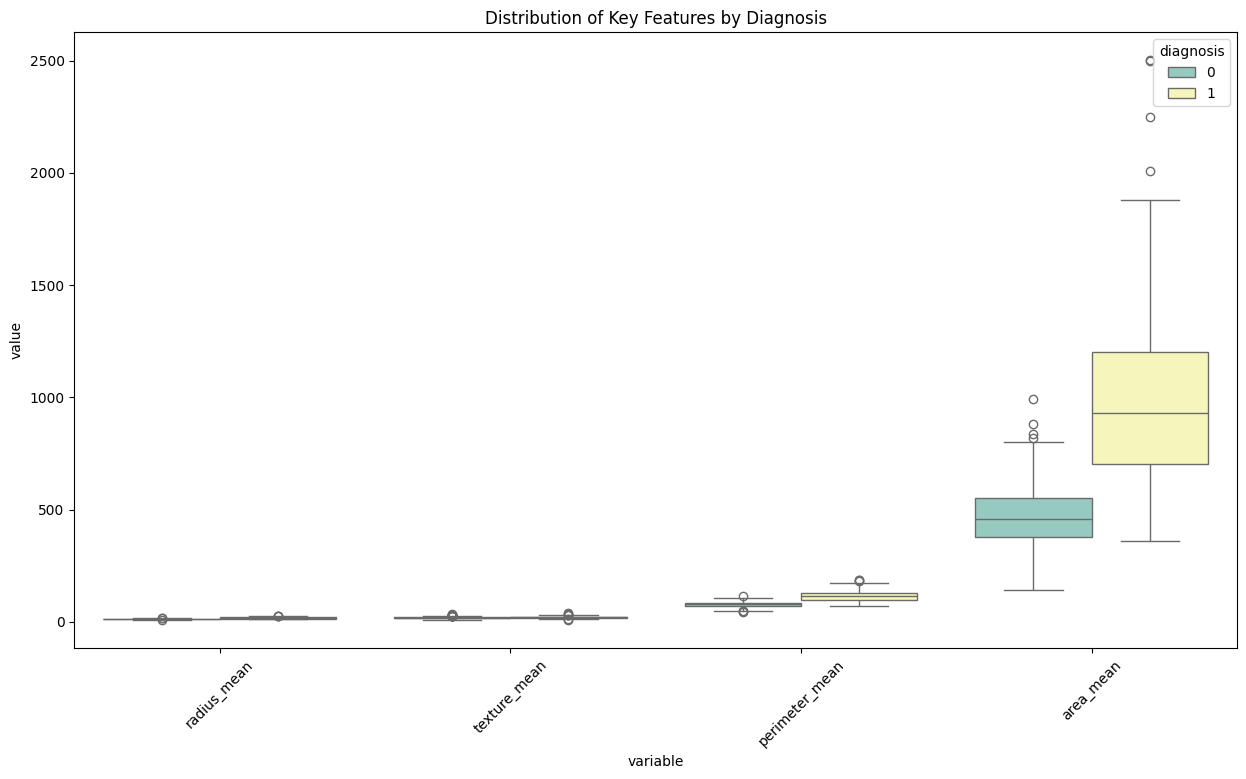

In [12]:
# Box Plot of Key Features
features_to_plot = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean']
plt.figure(figsize=(15,8))
cancer_melted = cancer.melt(id_vars='diagnosis', value_vars=features_to_plot)
sns.boxplot(x='variable', y='value', hue='diagnosis', data=cancer_melted, palette='Set3')
plt.title('Distribution of Key Features by Diagnosis')
plt.xticks(rotation=45)
plt.show()

In [3]:
X = cancer.drop('diagnosis', axis=1)  
y = cancer['diagnosis']  
X_imputed = SimpleImputer(strategy='median').fit_transform(X)

c:\Users\ppawa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\impute\_base.py:577: UserWarning: Skipping features without any observed values: ['Unnamed: 32']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [5]:
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)
gb = GradientBoostingClassifier(random_state=42)
gnb = GaussianNB()
svm = LinearSVC(random_state=42) 
log_reg = LogisticRegression(random_state=42)
knn = KNeighborsClassifier()

dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
gb.fit(X_train, y_train)
gnb.fit(X_train, y_train)
svm.fit(X_train, y_train)
log_reg.fit(X_train, y_train)
knn.fit(X_train, y_train)

models = {
    'Decision Tree': dt,
    'Random Forest': rf,
    'Gradient Boosting': gb,
    'Naive Bayes': gnb,
    'SVM': svm,
    'Logistic Regression': log_reg,
    'K-Nearest Neighbors': knn
}
accuracies = {}

for name, model in models.items():
    accuracy = model.score(X_test, y_test)
    accuracies[name] = accuracy
    print(f"{name} Accuracy: {accuracy:.2f}")

c:\Users\ppawa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Decision Tree Accuracy: 0.94
Random Forest Accuracy: 0.96
Gradient Boosting Accuracy: 0.95
Naive Bayes Accuracy: 0.96
SVM Accuracy: 0.96
Logistic Regression Accuracy: 0.97
K-Nearest Neighbors Accuracy: 0.95


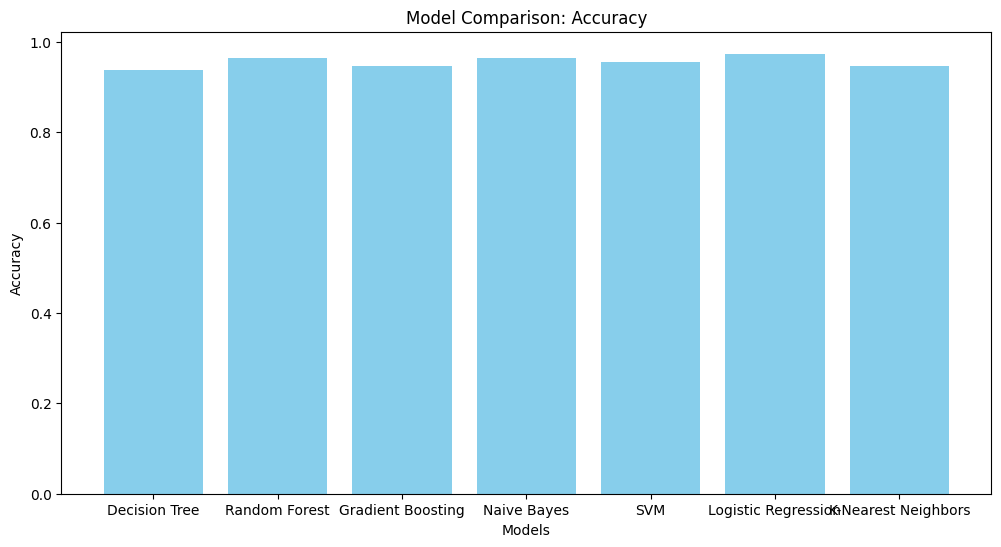

In [6]:
plt.figure(figsize=(12, 6))
plt.bar(accuracies.keys(), accuracies.values(), color='skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Comparison: Accuracy')
plt.show()